<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Mv-g-and-k-distribution/mvgandk_conv_mmd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate g-and-k distribution

Notebook for the convergence of the MMD$^2$ approximation

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

Set path for saving the results (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Inference/'

In [ ]:
np.random.seed(11)

## MMD$^2$ convergence for varying $n$

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,15) ]          # number of simulated samples - powers of 2
m = 2**15                                  # number of true samples
num = 25                                   # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2),0.1])   # true theta
d = 50                                      # dimensions of data
p = theta.shape[0]                         # dimensions of parameter space
kernel = 'gaussian'                        # 'gaussian' or 'imq'
l = 1.5*d**(1/2)                           # lengthscale for Gaussian kernel (l=-1 for median heuristic)
c = 1                                      # parameter c for IMQ kernel
b = -0.5                                   # parameter beta for IMQ kernel
nu = 0                                     # parameter for Matern kernel 
inv = True                                 # True: use inverse transform, False: use Box-Muller transform
mc_all = False                             # True: also output all MC draws; False: only output min, max and mean
stat_type = 'v'                            # 'v' for V-statistic, 'u' for U-statistic

Define the QMC sequence:

In [ ]:
if inv:
  qmc = qmcpy.Halton(d)
else:  
  qmc = qmcpy.Halton(d+1)

Calculate MMD$^2$ approximation for varying $n$:

In [ ]:
if inv:
  if mc_all:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,mmd_all_mc = mmd_conv_inv('mvgandk',n,num,d,l,c,b,nu,kernel,stat_type,theta,mc_all=mc_all)
  else:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv_inv('mvgandk',n,num,d,l,c,b,nu,kernel,stat_type,theta)
else:
  if mc_all:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,mmd_all_mc = mmd_conv('mvgandk',n,num,d,l,c,b,nu,kernel,stat_type,theta,mc_all=mc_all)
  else:
    mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv('mvgandk',n,num,d,l,c,b,nu,kernel,stat_type,theta)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192
sample size:  16384


Plot the MMD$^2$ approximation against $n$:

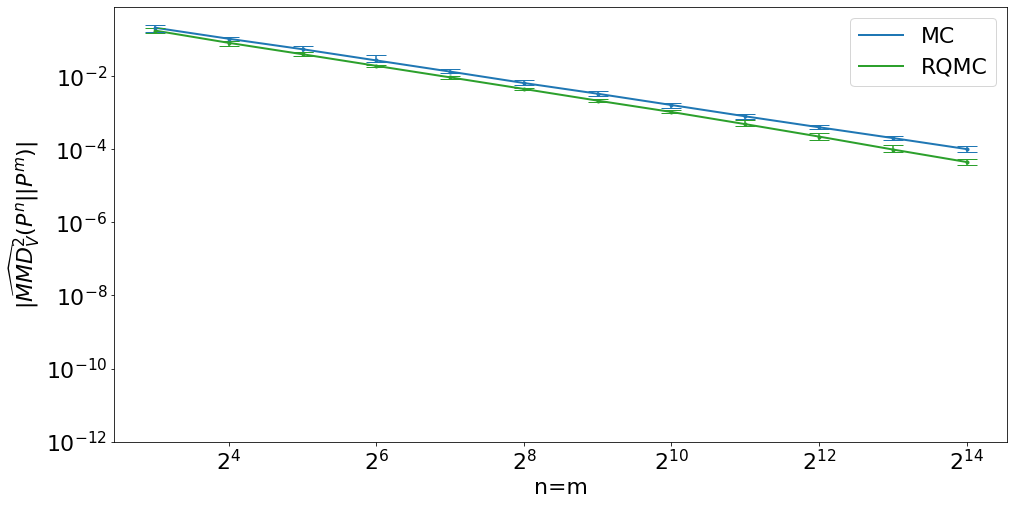

In [ ]:
if mc_all:
  plot_mmd_conv(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'mvgandk',stat_type,mmd_all_mc,15)
else:
  plot_mmd_conv(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'mvgandk',stat_type)

In [ ]:
np.savez(path + "mvgandk_mmd2_n_d=%s_%sstat_k%s.npz" %(d,stat_type,kernel), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)

## MMD$^2$ convergence for varying $d$

Calculate MMD$^2$ approximation for varying $d$:

In [ ]:
np.random.seed(11)

In [ ]:
n = 2**13                                  # number of simulated samples
d = [1,5,10,15,20,25,50,75,100,150,200,300]      # dimensions of data
num = 25                                   # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2),0.1])   # true theta
p = theta.shape[0]                         # dimensions of parameter space
kernel = 'gaussian'                        # 'gaussian' or 'imq'
l = 1.5                                    # lengthscale for Gaussian kernel
c = 1                                      # parameter c for IMQ kernel
b = -0.5                                   # parameter beta for IMQ kernel
nu = 0
inv = True                                 # True: use inverse transform, False: use Box-Muller transform
mc_all = False                             # True: also output all MC draws; False: only output min, max and mean
stat_type = 'v'                            # 'v' for V-statistic, 'u' for U-statistic
ladapt = True                              # True: lengthscal proportional to d**(1/2)

Define the QMC sequence:

In [ ]:
if inv:
  qmc = qmcpy.Halton(np.max(d))
else:  
  qmc = qmcpy.Halton(np.max(d)+1)

Calculate MMD$^2$ approximation for varying $d$:

In [ ]:
if mc_all:
  mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,mmd_all_mc = mmd_conv_d('mvgandk',n,num,d,l,c,b,nu,kernel,stat_type,theta,mc_all=mc_all,ladapt=ladapt)
else:
  mmd_mc,mmd_qmc,mmd_rqmc,mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc = mmd_conv_inv_d('mvgandk',n,num,d,l,c,b,nu,kernel,stat_type,theta,ladapt=ladapt)

number of dimensions:  1
number of dimensions:  5
number of dimensions:  10
number of dimensions:  15
number of dimensions:  20
number of dimensions:  25
number of dimensions:  50
number of dimensions:  75
number of dimensions:  100
number of dimensions:  150
number of dimensions:  200
number of dimensions:  300


Plot MMD$^2$ approximation for varying $d$:

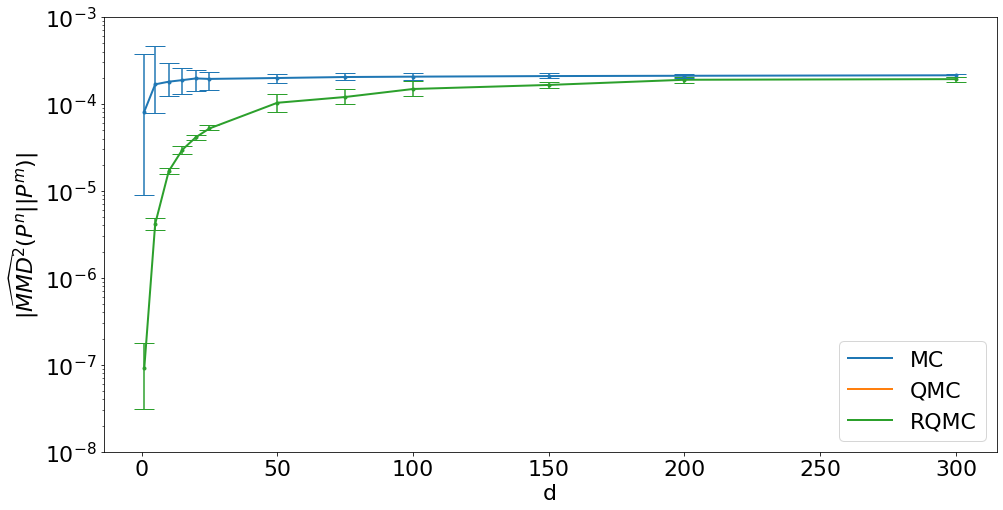

In [ ]:
if mc_all:
  plot_mmd_conv_d(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'mvgandk',stat_type_mmd_all_mc,15)
else:
  plot_mmd_conv_d(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',mmd_min_mc,mmd_max_mc,mmd_min_rqmc,mmd_max_rqmc,'mvgandk',stat_type)

In [ ]:
np.savez(path + "mvgandk_mmd2_d_n=8192_%sstat_k%s.npz" %(stat_type,kernel), mmd_mc=mmd_mc,mmd_min_mc=mmd_min_mc,mmd_max_mc=mmd_max_mc,mmd_rqmc=mmd_rqmc,mmd_min_rqmc=mmd_min_rqmc,mmd_max_rqmc=mmd_max_rqmc,mmd_qmc=mmd_qmc)